# Week 8 assignment: NLP on social media data

Take our social media we collected last week and:

- extract the sentiment scores of the titles of the posts
    - you can use the keyword method, Python packages, or other methods to extract the sentiment scores
- plot a histogram of the sentiment scores
- look at descriptive statistics (mean, median, standard deviation) of the sentiment scores
- examine the text for some of the highest and lowest sentiment scores
- write a short analysis of the results and our process, as well as propose one idea for something we could use this data for

Optional advanced challenges:
- Compare different sentiment analysis methods (e.g. textblob and VADER). Does one seem to work better than another?
- Get the sentiments of the comments for each post. We can do a lot with this, such as:
    - look at the average sentiment for each post and compare it with the sentiment of the title and/or text
    - look at the distribution of sentiments for each post and find the posts with the widest range of sentiments (controversial posts)
- Examine the subjectivity of our data (e.g. using textblob)
- Use topic modeling on the posts
    - you can also add in the comments to the topic model
- Look at the most frequent words for positive and negative sentiment posts

Note: There is no assignment solution file for this week.

In [1]:
# %pip install pandas numpy matplotlib

In [2]:
import sqlite3
import pandas as pd

con = sqlite3.connect('co_reddit.sqlite')
df = pd.read_sql_query('SELECT * from posts;', con)
con.close()
df

,title,link,author,n_comments,score,text
0,Bedini SG energizer (!motor),/r/Tesla/comments/1gxe3oj/bedini_sg_energizer_...,juanmf1,5,12,\nAaron murakami wrote a 3-book series on Bedi...
1,Sad day. Tesla's Lab on Long Island Burned to ...,/r/Tesla/comments/180wt0g/sad_day_teslas_lab_o...,iPhone_3GS,88,298,
2,Tesla's FBI File and US Patents,/r/Tesla/comments/17o6ku7/teslas_fbi_file_and_...,amarnaredux,12,53,FBI File on Tesla (Declassified):\n\nhttp://li...
3,Tubular linear motor mail transport 1886 Port ...,/r/Tesla/comments/17kd9tf/tubular_linear_motor...,dalkon,8,101,
4,Solar power utility in Ralph 124C 41+ (1911),/r/Tesla/comments/16qfnhk/solar_power_utility_...,dalkon,9,92,
...,...,...,...,...,...,...
320,Did Nikola Tesla cause the Tunguska explosion ...,/r/Tesla/comments/4ghtgw/did_nikola_tesla_caus...,Catesbury,1,2,
321,Tesla Coil Wireless Energy and Resonance Demon...,/r/Tesla/comments/4gac43/tesla_coil_wireless_e...,oDinZu,0,10,
322,Tesla was a super hero. Here's the proof:,/r/Tesla/comments/4fvote/tesla_was_a_super_her...,ragnarok0078,0,3,
323,For all the Tesla drivers out there. I imagine...,/r/Tesla/comments/4fcchn/for_all_the_tesla_dri...,maxpash,5,17,


In [3]:
sentiment_df = pd.read_csv('AFINN-en-165.txt', sep='\t', names=['word', 'score'], index_col='word')

In [4]:
sentiment_df

,score
word,
abandon,-2
abandoned,-2
abandons,-2
abducted,-2
abduction,-2
...,...
yucky,-2
yummy,3
zealot,-2


In [5]:
sentiment_dict = sentiment_df.to_dict()['score']
sentiment_dict

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'aborted': -1,
 'aborts': -1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusing': -3,
 'abusive': -3,
 'accept': 1,
 'acceptable': 1,
 'acceptance': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accessible': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'acclaim': 2,
 'acclaimed': 2,
 'accolade': 2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accomplishment': 2,
 'accomplishments': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimo

In [6]:
import numpy as np

title_sentiments = []
for title in df['title']:
    words = title.lower().split()
    this_titles_sentiments = []
    for w in words:
        if w in sentiment_dict.keys():
            this_titles_sentiments.append(sentiment_dict[w])
        else:
            this_titles_sentiments.append(0)
            
    
    title_sentiments.append(np.mean(this_titles_sentiments))

In [7]:
df['keyword_sentiment'] = title_sentiments

In [8]:
df['keyword_sentiment'].mean()

0.004842036748451252

In [9]:
titles=df['title']

In [10]:
df.sort_values(by='keyword_sentiment')[['title', 'keyword_sentiment']]

,title,keyword_sentiment
183,The Current War,-0.666667
298,Why no google doodle for Teslas Birthday? WTF ...,-0.555556
272,Let's Build a Goddamn Tesla Museum,-0.500000
126,Nikola Tesla Forbidden History,-0.500000
223,Nikola Tesla’s 5 Lost Inventions That Threaten...,-0.500000
...,...,...
312,"Teslas greatest achievements, what are they???",0.500000
266,Nikola Tesla's Amazing Predictions for the 21s...,0.500000
232,I made this pint glass to celebrate some of Te...,0.588235
168,What's the best Tesla biography?,0.600000


In [11]:
df.sort_values(by='keyword_sentiment')['title'].to_list()[:10]

['The Current War',
 'Why no google doodle for Teslas Birthday? WTF Google?',
 "Let's Build a Goddamn Tesla Museum ",
 'Nikola Tesla Forbidden History',
 'Nikola Tesla’s 5 Lost Inventions That Threatened The Global Elite',
 'Tesla Tower in Red Dead Redemption 2',
 '10 Quotes from Nikola Tesla (The mad scientist)',
 'The Incredible Genius that America Ignored',
 "Tesla's Death Ray: A Murder Declassified, starting on Discovery Channel Jan. 2",
 'Elihu Thomson denies "Heaviside theory" (whispering gallery) 1922']

In [12]:
df.sort_values(by='keyword_sentiment', ascending=False)['title'].to_list()[:10]

['Happy birthday, Mr. Tesla!',
 "What's the best Tesla biography?",
 "I made this pint glass to celebrate some of Tesla's many accomplishments and his one true love",
 "Nikola Tesla's Amazing Predictions for the 21st Century",
 'Teslas greatest achievements, what are they???',
 'Hopefully you guys enjoy this as much as I did.',
 'Improved Tesla Valve CFD simulation',
 "Tesla was a super hero. Here's the proof:",
 'Gain the Vision of Nikola Tesla [x-post r/getMotivated]',
 "Supreme Court's 1943 decision on early radio priority of invention [pdf]"]

In [13]:
from textblob import TextBlob

tb = TextBlob("He made chicken curry very delicious")
tb.sentiment

Sentiment(polarity=0.2, subjectivity=0.975)

In [14]:
tb = TextBlob("He made chicken curry tasteless")
tb.sentiment

Sentiment(polarity=-0.6, subjectivity=0.925)

In [15]:
def get_tb_sentiment(text):
    tb = TextBlob(text)
    return tb.sentiment[0]

df['tb_sentiment'] = df['title'].apply(get_tb_sentiment)

<Axes: ylabel='Frequency'>

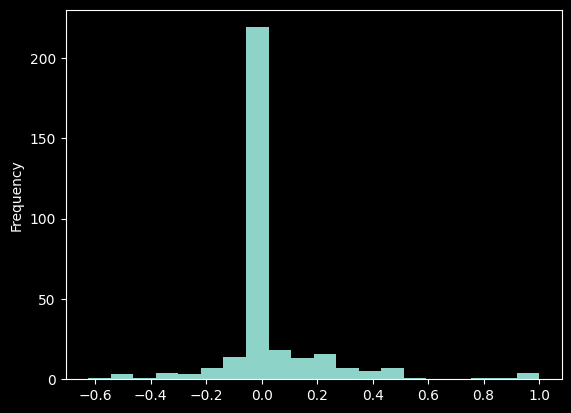

In [16]:
df['tb_sentiment'].plot.hist(bins=20)

In [17]:
df['tb_sentiment'].mean()

0.040384836321086325

In [18]:
# %pip install vaderSentiment

In [19]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 

analyzer = SentimentIntensityAnalyzer()
analyzer.polarity_scores("He made chicken curry tasteless")

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [20]:
analyzer.polarity_scores("He made chicken curry tasteless")['compound']

0.0

In [21]:
#apply vader to the whole df
df['compound'] = [analyzer.polarity_scores(i)['compound'] for i in df['title']]

In [22]:
df['compound'].mean()

0.0635196923076923

<Axes: ylabel='Frequency'>

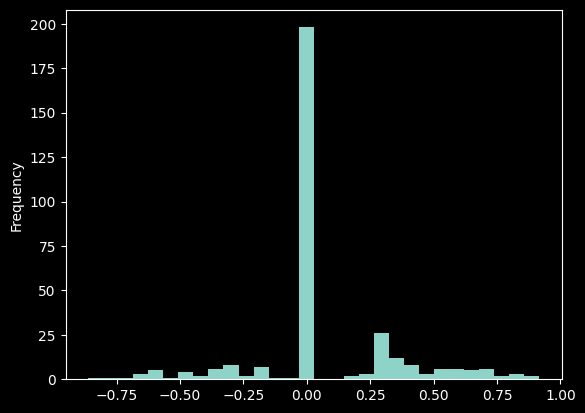

In [23]:
df['compound'].plot.hist(bins=30)

# Summary

The goal of this assignment is to analyze the sentiment of social media posts using different analysis methods, this analysis includes data visualization, statistical evaluation.

# Sentiment Extraction
 I ectracted sentiment scores from post titles using python-based analysis like Textloob and compare extraction methods to evaluate their effectiveness.

# Data Visualization
 We plotted a histogram to visualize the distribution of sentiment scores and analyzed the spread of sentiment values and identify trends.

# Desriptive Statistics
 I computed key metrics like mean,median and standard deviation of scores and examined the variations across posts

# Detailed Analysis
 we identify posts with high and low scores and review the text of these cases to understand the context behind their classification.
